<img src="Figures/top_ML.png" alt="Drawing" style="width: 1000px;"/>

# Sesión 6. Ejemplo de Market segmentation

Ejemplo para explicar el concepto de segmentación de clientes. 

**Objetivo**: Usted es dueño del centro comercial y quiere entender el comportamiento de sus clientes, para pasar esta información al equipo de márketing y planificar la estrategia en consecuencia.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Importo los datos
df=pd.read_csv("Data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
#Comprobamos si hay missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0.5, 1.0, 'Distribution of Gender')

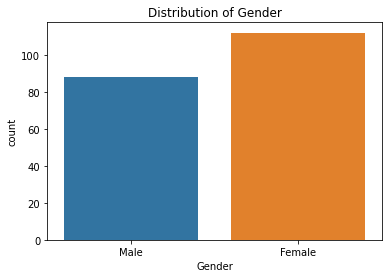

In [3]:
import seaborn as sns
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')

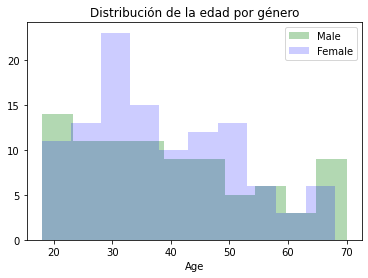

In [4]:
plt.hist('Age', data=df[df['Gender'] == 'Male'], alpha=0.3, color='g', label='Male')
plt.hist('Age', data=df[df['Gender'] == 'Female'], alpha=0.2, color='b',label='Female')
plt.title('Distribución de la edad por género')
plt.xlabel('Age')
plt.legend()

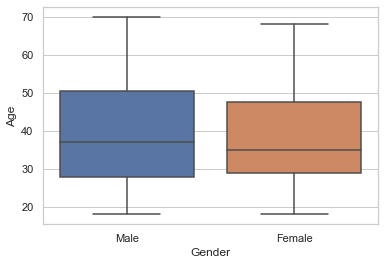

In [5]:
sns.set(style="whitegrid")
sns.boxplot(x="Gender", y="Age", data=df)

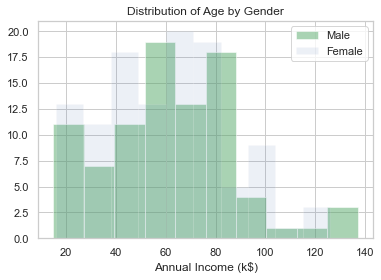

In [6]:
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Male'], alpha=0.5, color='g', label='Male')
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Female'], alpha=0.1, color='b',label='Female')
plt.title('Distribution of Age by Gender')
plt.xlabel('Annual Income (k$)')
plt.legend()

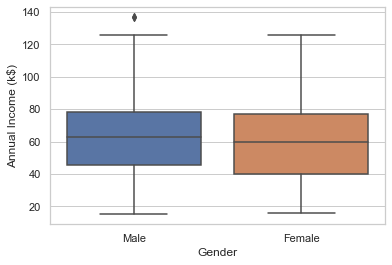

In [7]:
sns.set(style="whitegrid")
sns.boxplot(x="Gender", y="Annual Income (k$)", data=df)

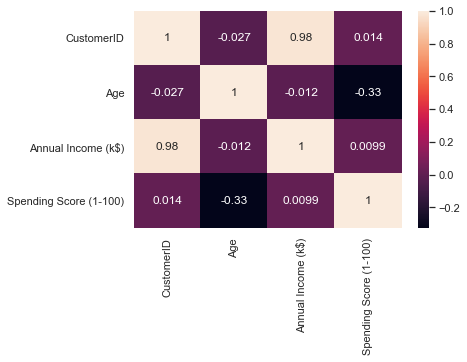

In [8]:
sns.heatmap(df.corr(), annot=True)

## EJEMPLO 1: Gasto vs Edad

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age to Spending Score')

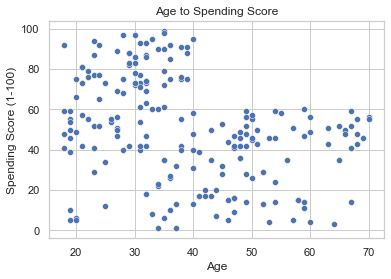

In [9]:
sns.scatterplot('Age', 'Spending Score (1-100)', data=df)
plt.title('Age to Spending Score')

Para establecer el número de clusters que queremos tener como resultado, usaremos el **método Elbow:**

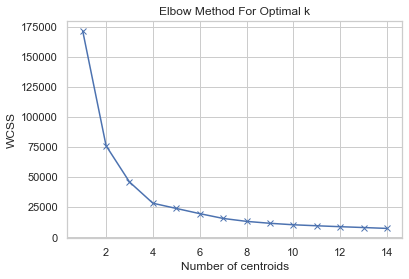

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []  # Within-Cluster Sum of Square. 
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df.iloc[:,[2,4]])  # Age vs spending score
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

La varianza dentro del cluster (WCSS) comienza a estabilizarse a partir del 4º clúster, así que estableceremos k=4.

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]


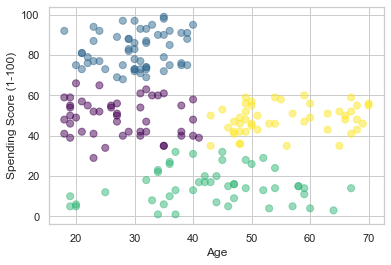

In [11]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df.iloc[:,[2,4]])
y_kmeans = kmeans.predict(df.iloc[:,[2,4]])

plt.scatter(df['Age'], df['Spending Score (1-100)'], c=y_kmeans, s=50, alpha=0.5, cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
print(centers)

Así que el grupo objetivo de márketing podría ser el siguiente:

* Grupo de personas jóvenes con un alto gasto.
* Grupo de personas jóvenes con un alto medio.
* Grupo de personas mayores con un gasto medio.
* Gasto bajo, sin importar la edad.

## EJEMPLO 2: Gasto vs Ingresos

Pero...qué pasa si escogemos otras variables diferentes? 


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Annual Income to Spending Score')

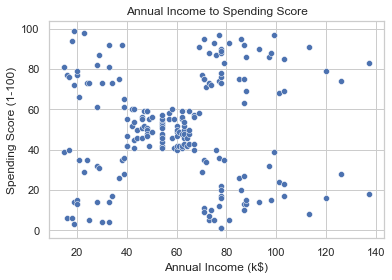

In [12]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=df)
plt.title('Annual Income to Spending Score')

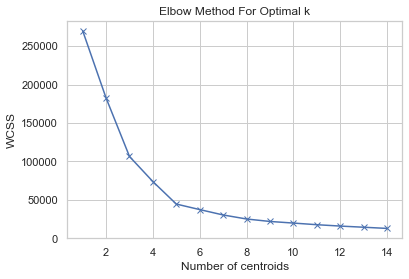

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df.iloc[:,[3,4]])
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

Text(0, 0.5, 'Spending Score (1-100)')

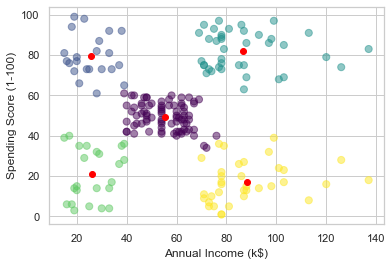

In [14]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df.iloc[:,[3,4]])
y_kmeans = kmeans.predict(df.iloc[:,[3,4]])

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

Detecta los siguientes grupos:

* Ingresos bajos - gasto bajo
* Ingresos bajos - gasto alto
* Ingresos medios - gasto medio
* Ingresos altos - gasto bajo
* Ingresos altos - gasto alto 

## EJEMPLO 3: Clustering utilizando PCA analysis. 

El atributo 'Gender' está en formato categórico. Hay que transformarlo a numérico.

In [16]:
import matplotlib.colors
from sklearn.preprocessing import LabelEncoder

lab_encoder = LabelEncoder() 
lab_encoder.fit(df['Gender'])  
print(lab_encoder.classes_)  # Muestra las clases diferentes que hay
df['Gender'] = lab_encoder.transform(df['Gender'])
print(df['Gender'])


[0 1]
0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64


## Reducción de dimensiones: PCA

Reduzco el dataset a 2 componentes principales que guardan toda la información de los atributos

In [17]:
# Importamos la librería de Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

print(df.columns)

pca = PCA(n_components=2) 
results_pca = pca.fit_transform(df)
print(results_pca)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
[[-1.09383941e+02  5.47845404e+00]
 [-1.08202857e+02 -3.49317649e+01]
 [-1.07376292e+02  3.78408717e+01]
 [-1.06007807e+02 -3.05626965e+01]
 [-1.04980323e+02  7.29674715e+00]
 [-1.03774723e+02 -2.98012381e+01]
 [-1.02996481e+02  4.13227699e+01]
 [-1.01426745e+02 -4.70713035e+01]
 [-1.00952191e+02  5.09237382e+01]
 [-9.93805223e+01 -2.40346077e+01]
 [-9.90706564e+01  4.09178725e+01]
 [-9.74040858e+01 -4.91523683e+01]
 [-9.67777825e+01  3.78938689e+01]
 [-9.52523148e+01 -3.02508027e+01]
 [-9.48417033e+01  3.50274282e+01]
 [-9.34009908e+01 -3.26452221e+01]
 [-9.24499251e+01  1.31741290e+01]
 [-9.12420152e+01 -2.04349779e+01]
 [-8.99471970e+01  2.29456992e+01]
 [-8.84752130e+01 -4.81072460e+01]
 [-8.75736418e+01  1.32190190e+01]
 [-8.63488497e+01 -2.60551150e+01]
 [-8.56046385e+01  4.49591024e+01]
 [-8.41501483e+01 -2.46587601e+01]
 [-8.25415544e+01  3.80714828e+01]
 [-8.1028

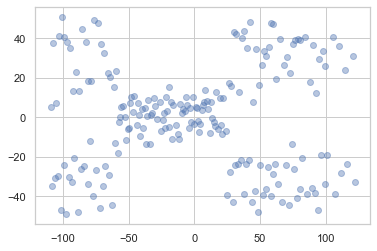

In [18]:
# Ploteamos los resultados del PCA 
plt.scatter(results_pca[:, 0], results_pca[:, 1],alpha=0.4)
plt.show()

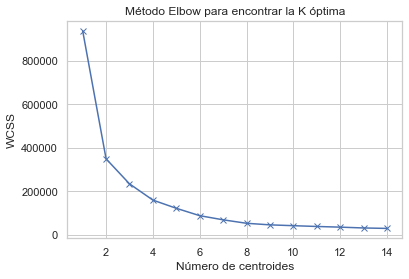

In [19]:
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(results_pca)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Número de centroides')
plt.ylabel('WCSS')
plt.title('Método Elbow para encontrar la K óptima')
plt.show()

Text(0, 0.5, 'Spending Score (1-100)')

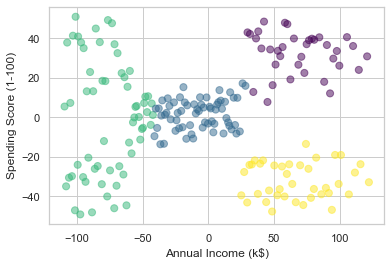

In [24]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(results_pca)
y_kmeans = kmeans.predict(results_pca)

plt.scatter(results_pca[:, 0], results_pca[:, 1], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')